## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости (1й столбец - номер города, 2й и 3й - координаты). Используйте L1 расстояние для расчетов и визуализации.



In [339]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
from tqdm import tqdm

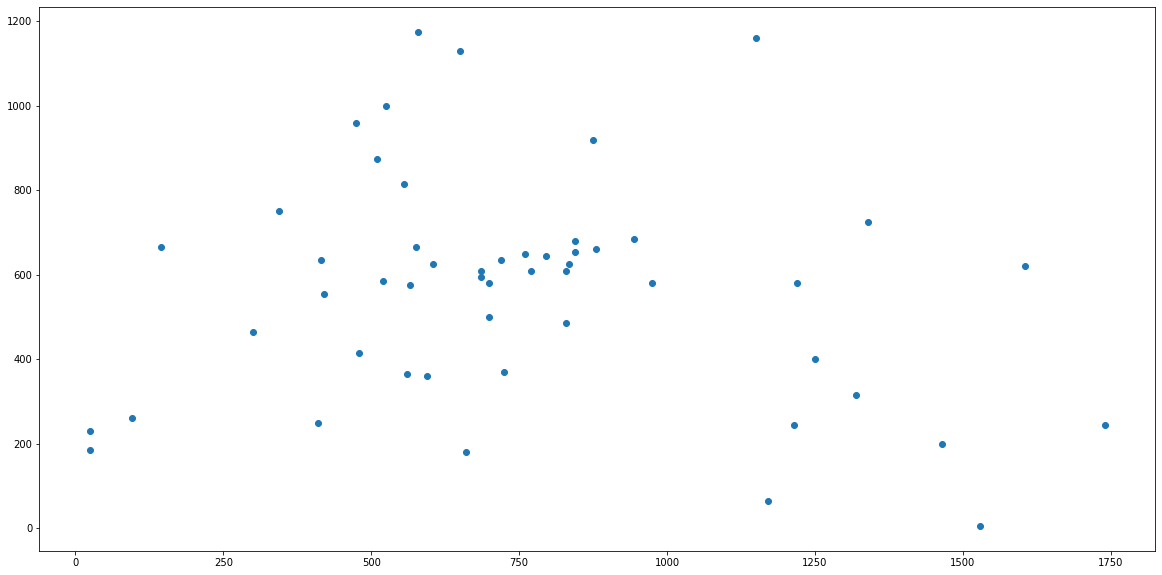

In [17]:
df = pd.read_csv('hw9_data/tsp.csv', names=['name', 'x', 'y'])
plt.figure(figsize=(20, 10))
plt.scatter(df.x, df.y)
plt.show()

In [25]:
# рассчет матрицы расстояний
def dist_matrix(vec, metric='cityblock'):
    return cdist(vec, vec, metric=metric)

In [66]:
# рассчет длины маршрута
def calculate_path_len(dists, path):
    total = 0
    
    n = len(path)
    for i in range(n):
        if i == n - 1:
            break
        total += dists[path[i]][path[i + 1]]
    
    return total

In [169]:
def visualise(path):
    plt.figure(figsize=(20, 10))
    plt.plot(df.x[path], df.y[path])
    plt.scatter(df.x, df.y)
    plt.show()

In [170]:
dists = dist_matrix(df[['x', 'y']].values)

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

In [171]:
def monte_carlo(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
    
    best = None
    best_path = None
    
    for _ in range(iterations):
        np.random.shuffle(idx)
        
        new_len = calculate_path_len(dists, idx)
        
        if best == None or new_len < best:
            best = new_len
            best_path = np.copy(idx)
    
    return best, best_path

In [172]:
res = monte_carlo(dists)
res

(27045.0,
 array([28,  6,  1, 47, 35, 21, 49, 50, 10, 32, 37,  8, 46, 26, 25, 51, 12,
         7, 44, 22,  3, 11, 23, 13, 27, 29, 31, 39, 38, 16,  5, 19, 43, 33,
        14,  9, 24, 34, 45, 36, 48, 30, 17,  4, 40, 18,  0, 15, 42,  2, 20,
        41]))

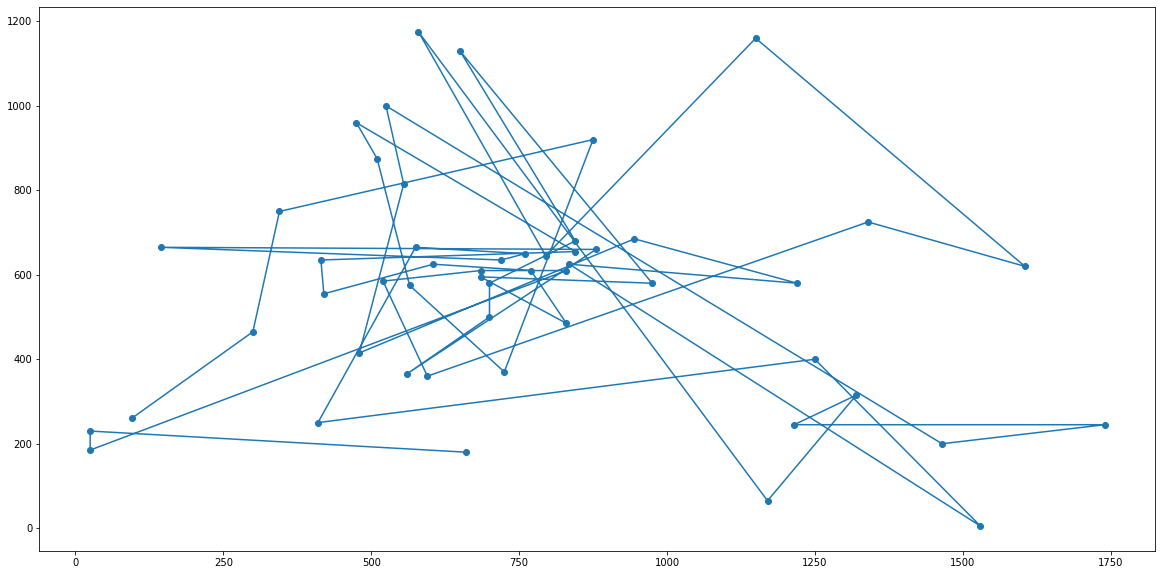

In [173]:
visualise(res[1])

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

Для случайного блуждания будем "переворачивать" случайную часть маршрута на обратную

In [174]:
def random_walk(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
        
    # случайный маршрут
    np.random.shuffle(idx)
    start_len = calculate_path_len(dists, idx)
    
    best = start_len
    best_path = np.copy(idx)
    
    for _ in range(iterations):
        flip_idx = np.sort(np.random.choice(n, 2, replace=False))
    
        idx[flip_idx[0]: flip_idx[1] + 1] = np.flip(idx[flip_idx[0]: flip_idx[1] + 1])
        new_len = calculate_path_len(dists, idx)
        
        if new_len < best:
            best = new_len
            best_path = np.copy(idx)
    
    best = calculate_path_len(dists, best_path)
    
    return best, best_path

In [175]:
res = random_walk(dists)
res

(28745.0,
 array([10, 13, 17, 48,  3, 24, 33, 42, 28,  1,  6, 22, 12, 51, 40,  4, 43,
        41, 46, 38, 36, 45, 21,  2, 16, 18,  7,  5, 23, 47, 50, 25, 14, 27,
        39, 35, 31, 20, 19, 34, 30, 37, 44,  8, 26, 11,  0, 32,  9, 15, 49,
        29]))

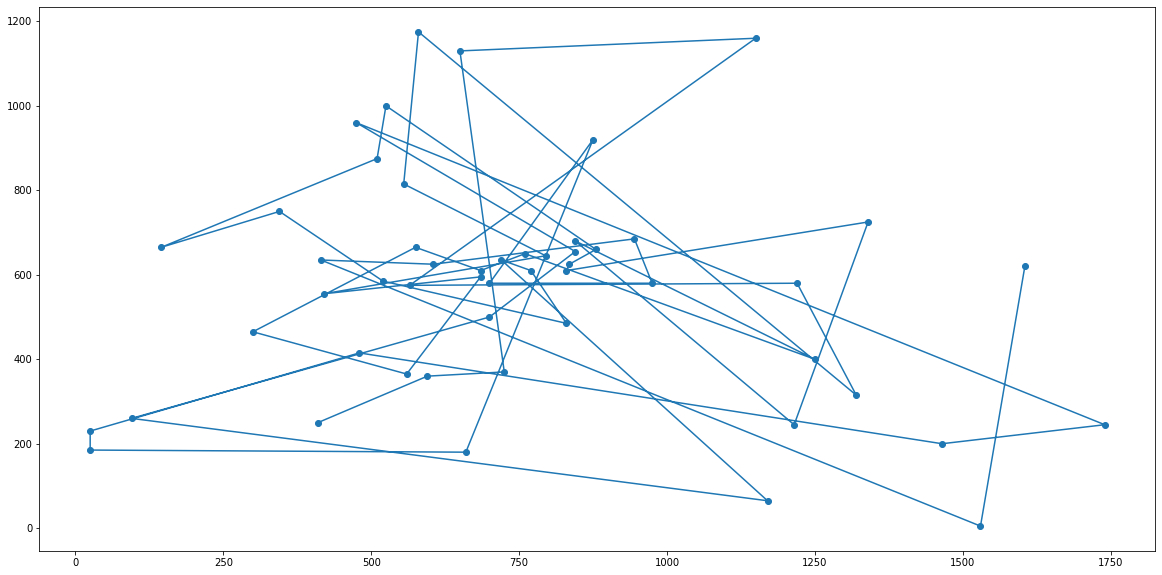

In [176]:
visualise(res[1])

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [179]:
def hill_climb(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
        
    # случайный маршрут
    np.random.shuffle(idx)
    start_len = calculate_path_len(dists, idx)
    
    for _ in range(iterations):
        flip_idx = np.sort(np.random.choice(n, 2, replace=False))
        
        old_p1 = 0
        new_p1 = 0
        if flip_idx[0] > 0:
            old_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[0]]]
            new_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[1]]]
        
        old_p2 = 0
        new_p2 = 0
        if flip_idx[1] < n - 1:
            old_p2 = dists[idx[flip_idx[1]]][idx[flip_idx[1] + 1]]
            new_p2 = dists[idx[flip_idx[0]]][idx[flip_idx[1] + 1]]
                
        new_len = start_len - old_p1 - old_p2 + new_p1 + new_p2
        
        if new_len < start_len:
            start_len = new_len
            idx[flip_idx[0]: flip_idx[1] + 1] = np.flip(idx[flip_idx[0]: flip_idx[1] + 1])
    
    start_len = calculate_path_len(dists, idx)
    
    return start_len, idx

In [189]:
res = hill_climb(dists)
res

(9715.0,
 array([13, 12, 51, 10, 50,  3, 42,  5, 14,  4, 39, 38, 36, 37, 23, 47, 45,
        24, 11, 27, 26, 25, 46, 28,  1,  6, 41, 29, 22, 19, 49, 15, 43, 33,
        34, 35, 48, 31,  0, 21, 17, 30, 20, 16,  2, 44, 18, 40,  7,  8,  9,
        32]))

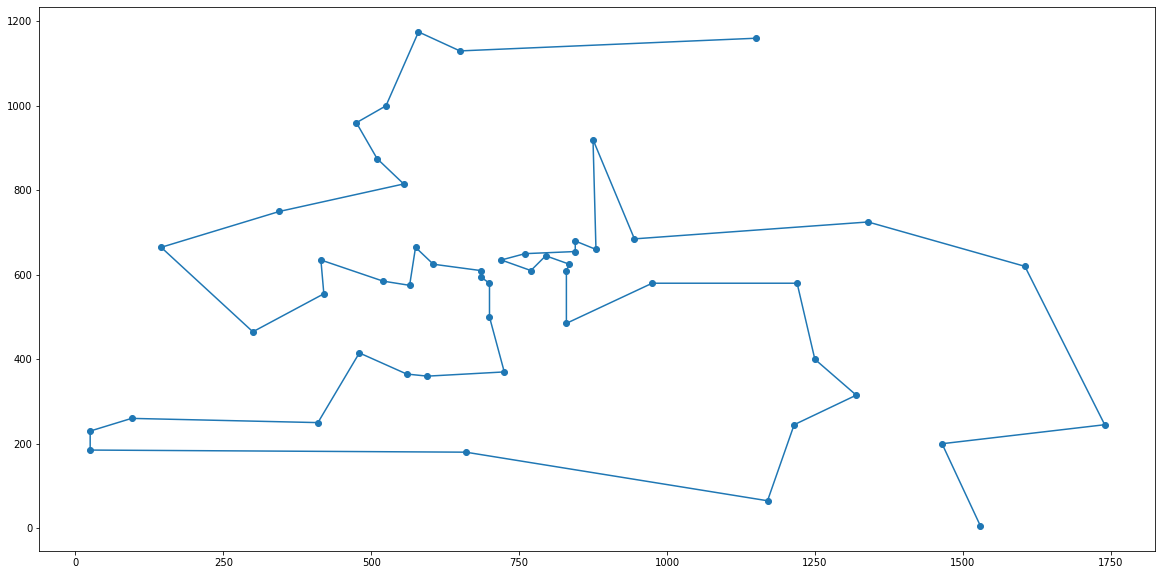

In [190]:
visualise(res[1])

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [204]:
def simulated_annealing(dists, iterations=100000):
    n = dists.shape[0]
    idx = np.arange(n)
        
    # случайный маршрут
    np.random.shuffle(idx)
    start_len = calculate_path_len(dists, idx)
    
    T = 1000
    mul = 0.99
    
    for _ in range(iterations):
        flip_idx = np.sort(np.random.choice(n, 2, replace=False))
        
        old_p1 = 0
        new_p1 = 0
        if flip_idx[0] > 0:
            old_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[0]]]
            new_p1 = dists[idx[flip_idx[0] - 1]][idx[flip_idx[1]]]
        
        old_p2 = 0
        new_p2 = 0
        if flip_idx[1] < n - 1:
            old_p2 = dists[idx[flip_idx[1]]][idx[flip_idx[1] + 1]]
            new_p2 = dists[idx[flip_idx[0]]][idx[flip_idx[1] + 1]]
                
        new_len = start_len - old_p1 - old_p2 + new_p1 + new_p2
        
        if np.random.rand() < np.exp((start_len - new_len) / T):
            start_len = new_len
            idx[flip_idx[0]: flip_idx[1] + 1] = np.flip(idx[flip_idx[0]: flip_idx[1] + 1])
        
        T *= mul
    
    start_len = calculate_path_len(dists, idx)
    
    return start_len, idx

In [205]:
res = simulated_annealing(dists)
res

<ipython-input-204-9966a584dbb1>:30: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp((start_len - new_len) / T):
<ipython-input-204-9966a584dbb1>:30: RuntimeWarning: overflow encountered in double_scalars
  if np.random.rand() < np.exp((start_len - new_len) / T):


(9485.0,
 array([13, 12, 51, 10, 50, 32,  9,  8,  7, 40, 18, 44,  2, 16, 17, 30, 21,
         0, 31, 48, 38, 39, 37, 36, 35, 34, 33, 43, 15, 45, 47, 23,  4, 14,
         5, 42,  3, 24, 11, 27, 26, 25, 46, 28, 49, 19, 22, 20, 29, 41,  6,
         1]))

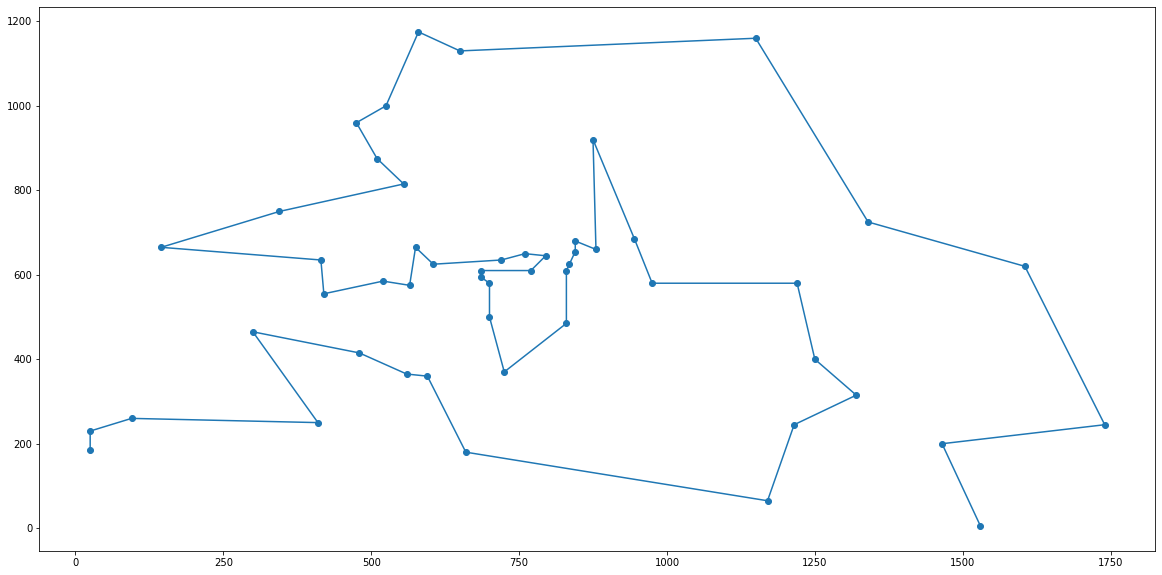

In [206]:
visualise(res[1])

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [348]:
def genetic(dists, iterations=10000):
    n = dists.shape[0]
#     idx = np.arange(n)
    PopNum = 100
    
    population = np.array([np.random.choice(n, n, replace=False) for _ in range(PopNum)])
    
    for i in tqdm(range(iterations)):
        scores = np.array([calculate_path_len(dists, p) for p in population])
        
#         print('best score:', min(scores))

        sort_idx = np.argsort(scores)
        
        # чем лучше результат тем вероятнее выбираем из популяции, выбираем половину популяции
        t = np.linspace(0, 1, PopNum)
        p = np.random.rand(PopNum)
        mask = p > t
        
        if sum(mask) < PopNum / 2:
            for i in range(len(mask)):
                if sum(mask) < PopNum / 2:
                    mask[i] = True
                else:
                    break
            c_pop_idx = sort_idx[mask]
        else:
            c_pop_idx = sort_idx[mask]
            c_pop_idx = c_pop_idx[:int(PopNum / 2)]
        
        childrens = []
                
        # берем случайные пары
        np.random.shuffle(c_pop_idx)
        for i in range(int(len(c_pop_idx) / 2)):
            i1 = c_pop_idx[i * 2]
            i2 = c_pop_idx[i * 2 + 1]
            
            p1 = population[i1]
            p2 = population[i2]
            
            # создаем детей таким образом, половину маршрута берем от одного родителя, 
            # а вторую полокину берем из последовательности оставшихся вершин второго родителя
            pn = len(p1)
            pn2 = int(pn / 2)
            
            c1 = p1[:pn2]            
            dind = []
            for i, p in enumerate(p2):
                if p in c1:
                    dind.append(i)
            c1 = np.append(c1, np.delete(p2, dind))
            # мутация с вероятностью 10 процентов
            if np.random.rand() <= 0.1:
                flip_idx = np.sort(np.random.choice(len(c1), 2, replace=False))
                mc1 = np.flip(c1[flip_idx[0]: flip_idx[1] + 1])
                c1[flip_idx[0]: flip_idx[1] + 1] = mc1
            
            c2 = p2[:pn2]            
            dind = []
            for i, p in enumerate(p1):
                if p in c2:
                    dind.append(i)
            c2 = np.append(c2, np.delete(p1, dind))
            # мутация с вероятностью 10 процентов
            if np.random.rand() <= 0.1:
                flip_idx = np.sort(np.random.choice(len(c2), 2, replace=False))
                mc2 = np.flip(c2[flip_idx[0]: flip_idx[1] + 1])
                c2[flip_idx[0]: flip_idx[1] + 1] = mc2
                        
            childrens.append(c1)
            childrens.append(c2)
                
        new_pop = population[c_pop_idx]
        new_pop = np.append(new_pop, np.array(childrens), axis=0)
        population = new_pop.copy()
    
    scores = np.array([calculate_path_len(dists, p) for p in population])
    sort_idx = np.argsort(scores)
    scores = scores[sort_idx]
    
    population = population[sort_idx]
    
    return scores[0], population[0]

In [349]:
res = genetic(dists)
res

100%|██████████| 10000/10000 [02:32<00:00, 65.56it/s]


(9465.0,
 array([ 9,  8,  7, 40, 18, 44,  2, 16, 20, 41,  6,  1, 29, 22, 19, 49, 28,
        15, 45, 43, 33,  0, 21, 30, 17, 31, 48, 35, 34, 38, 36, 39, 37, 14,
         4, 23, 47, 24,  3,  5, 42, 32, 50, 11, 27, 26, 25, 46, 13, 12, 51,
        10]))

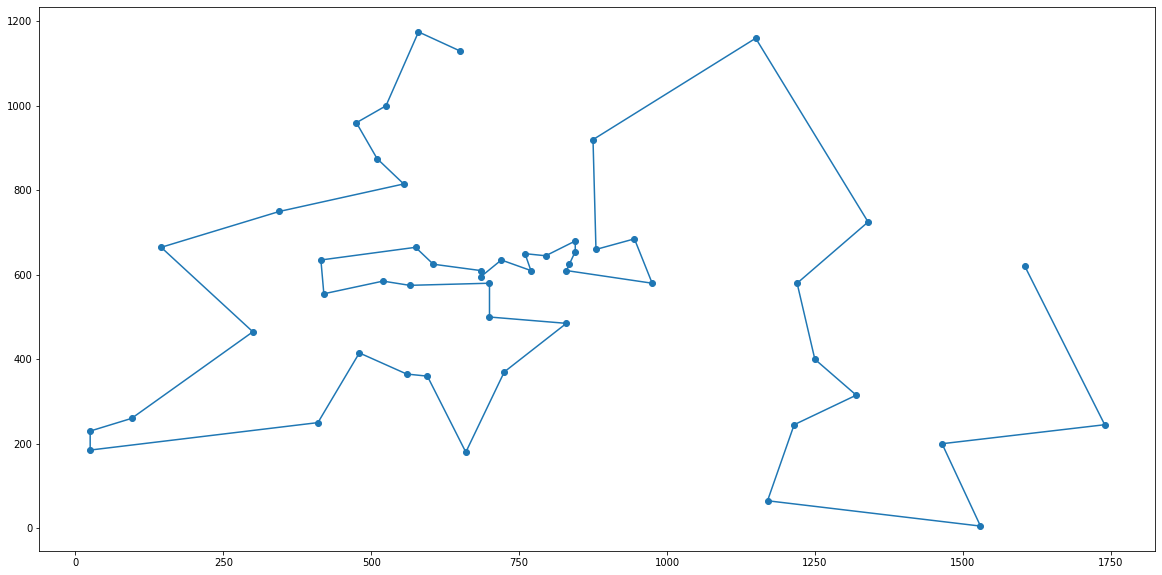

In [350]:
visualise(res[1])